In [44]:
!pip install ucamcl --upgrade
import ucamcl
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp', section='assignment2a')
# paste in whatever section is appropriate for the section of notes / assignment you're working on

Waiting for you to log in ... done.


In [41]:
# Import modules, and give them short aliases so we can write e.g. np.foo rather than numpy.foo
import numpy as np
import pandas
import matplotlib
import matplotlib.pyplot as plt
# The next line is a piece of magic, to let plots appear in our Jupyter notebooks
%matplotlib inline 

# Assignment 2. Econophysics simulator

Economic inequality is one of the defining social issues of our age. Yet we have a poor grasp of the scale of inequality,
as [described in Scientific American](https://www.scientificamerican.com/article/economic-inequality-it-s-far-worse-than-you-think/) 
and nicely shown in [this video](https://www.youtube.com/watch?v=QPKKQnijnsM):
[<img src="res/inequality.png" style="height:16em">](https://www.youtube.com/watch?v=QPKKQnijnsM)

How does inequality arise? Is it an inevitable outcome of liberal economics, and if so how can it be  mitigated by economic policy? These questions [have been studied by economists](https://link.springer.com/article/10.1140/epjst/e2016-60162-3) and more recently 
[by](https://phys.org/news/2007-04-world-economies-similarities-economic-inequality.html)
[physicists](https://arxiv.org/abs/1606.06051).
In this assignment you will investigate a simple "econophysics" model of inequality. The notes for [&sect;2](2.%20Numerical%20computation.ipynb) suggest ways to take the investigation further.

<div class="alert alert-warning">**About this assignment:** This assignment tests your vectorized thinking. You will be asked to run simulations on a population of hundreds of thousands of individuals, over many timesteps. Your code _must_ use NumPy vectorized operations rather than iterating over the population. You may use Python iteration over timesteps.
You can organize your code however you like. Please create a new notebook for your answers to this assignment.
</div>

# Part A: kinetic exchange model
This section is worth 1 mark. Check your answers as described in 
[&sect;0.3](0.%20About%20this%20course.ipynb#grader) using `section='assignment2a'`.

Here is a simple model. There are $N$ individuals in the population, each with an initial wealth of &pound;1. Every timestep, we randomly group them into $N/2$ pairs. (Assume $N$ is even.) For every pair, we simulate an economic exchange, as follows. Let the two paired individuals have wealth $v$ and $w$, and update their wealth according to
$$
v_{\text{new}} = R(v+w),
\quad
w_{\text{new}} = (1-R)(v+w)
$$
where $R$ is a random number in $[0,1]$, chosen independently for every pair and at every timestep.
This model is loosely inspired by the physics of gases, in which two gas molecules exchange a random amount of energy whenever they collide.

We can measure inequality with the [Gini coefficient](https://en.wikipedia.org/wiki/Gini_coefficient),
$$
G = 2\frac{\sum_{i=1}^N i\, w_{(i)}}{N \sum_i w_{(i)}} - \Big(1 + \frac{1}{N}\Bigr)
$$
where $w_{(1)}$ is the smallest value, $w_{(2)}$ the second smallest etc. If everyone has the same wealth then $G=0$; if one person has all the wealth then $G=1-1/N$.

**Question 1.** The model needs us to randomly group the population into $N/2$ pairs. 
We can do this by randomly permuting the vector $[0,...,N-1]$, letting the vector `m1` consist of the first $N/2$ integers and `m2` consist of the rest, and interpreting it as "`m1[i]` is paired with `m2[i]`".

Write a function `pairs(N)` that returns a tuple `(m1,m2)` where `m1` and `m2` are both vectors of length $N/2$ as described above. For example, if you run `pairs(6)`, you might get the output

> `(array[(3, 0, 1]), array([2, 4, 5]))`

```
# Submitting your answer:
q = GRADER.fetch_question('q1')
m1,m2 = pairs(q.n)
ans = {'n': len(np.unique(np.concatenate([m1,m2]))), 's': np.std(np.abs(m1-m2))}
GRADER.submit_answer(q, ans)
```

In [8]:
q = GRADER.fetch_question('q1')
m1,m2 = pairs(q.n)
ans = {'n': len(np.unique(np.concatenate([m1,m2]))), 's': np.std(np.abs(m1-m2))}
GRADER.submit_answer(q, ans)

[ 197 2728 5664 ..., 8603 8680 5076]
Correct!


(True, {'n': 10326, 's': 2433.1965341514333})

In [56]:
def pairs (n):
    a = np.random.permutation(n)
    return (a[:n//2],a[n//2:])

**Question 2.** Write a function `kinetic_exchange(v,w)` which takes two wealth vectors `v` and `w`, each of length $N/2$, and returns a tuple `(vnew, wnew)` with two new vectors, according to the kinetic exchange model.
```
# Submitting your answer:
q = GRADER.fetch_question('q2')
v,w = np.linspace(1,5,q.n), np.linspace(1,2,q.n)**q.p
vnew,wnew = kinetic_exchange(v,w)
ans = {'m1': np.mean(vnew), 's2': np.std(wnew)}
GRADER.submit_answer(q, ans)
```

In [12]:
q = GRADER.fetch_question('q2')
v,w = np.linspace(1,5,q.n), np.linspace(1,2,q.n)**q.p
vnew,wnew = kinetic_exchange(v,w)
ans = {'m1': np.mean(vnew), 's2': np.std(wnew)}
GRADER.submit_answer(q, ans)

Correct!


(True, {'m1': 2.4230207992699953, 's2': 1.6975230537033505})

In [11]:
def kinetic_exchange(v,w):
    length = len(w)
    r = np.random.rand(length)
    return (r*(v+w), (1-r)*(v+w))

**Question 3.** Write a function `gini(w)` which takes a vector `w` and returns the Gini coefficient.
```
# Submitting your answer:
q = GRADER.fetch_question('q3')
w = np.linspace(0,1,q.n)**q.p
g = gini(w)
GRADER.submit_answer(q, {'g': g})
```

In [57]:
q = GRADER.fetch_question('q3')
w = np.linspace(0,1,q.n)**q.p
g = gini(w)
GRADER.submit_answer(q, {'g': g})

Correct!


(True, {'g': 0.2395640107907515})

In [58]:
def gini(w):
    a = np.sort(w)
    numer = 0
    denom = 0
    N = len(w)
    for i in range(1,N+1):
        numer = numer + (i * a[i-1])
        denom = denom + (a[i-1])
    G = (2*numer)/(N*denom) - 1-(1/N)
    return G

**Question 4.** Write a function `sim(N, T)` which runs the kinetic exchange model on a population of $N$ individuals for $T$ timesteps. It should return a pair `(w, gs)` where `w` is the wealth vector after $T$ timesteps, and `gs` is a length $T$ vector where `gs[i]` is the Gini coefficient at timestep $i$.
```
# Submitting your answer:
q = GRADER.fetch_question('q4')
w,gs = sim(q.n, q.t)
ans = {'gm': np.mean(gs[int(q.t/2):]), 'gs': np.std(gs[int(q.t/2):]), 'ws': np.std(w)}
GRADER.submit_answer(q, ans)
```

In [69]:
q = GRADER.fetch_question('q4')
w,gs = sim(q.n, q.t)
ans = {'gm': np.mean(gs[int(q.t/2):]), 'gs': np.std(gs[int(q.t/2):]), 'ws': np.std(w)}
GRADER.submit_answer(q, ans)

Correct!


(True,
 {'gm': 0.490426630799237,
  'gs': 0.005663914005028157,
  'ws': 0.9916624857500047})

In [68]:
def sim(N,T):
    w = np.ones(N)
    gs = np.ones(T)
    for t in range(T):
        gs[t] = gini(w)
        a,b = pairs(N)
        w[a],w[b] = kinetic_exchange(w[a],w[b])
    return (w,gs)

**Question 5.** Simulate a population of 500,000 over 30 iterations. Plot the Gini coefficient as a function of timestep. (You don't have to submit your plot, but it may be assessed in the ticking session.) Your plot should look something like this:
![gini coefficient](res/ass2_q5.png)

In [70]:
w,gs = sim(500000, 1)
print(gs)

[  5.75114195e-17]


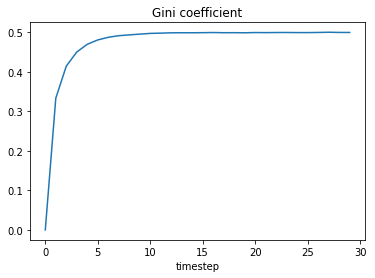

In [72]:
w,gs = sim(500000,30)
plt.plot(gs)
plt.xlabel('timestep')
plt.title('Gini coefficient')
plt.show()

# Part B: economic mobility
This section is worth 1 mark. Check your answers as described in 
[&sect;0.3](0.%20About%20this%20course.ipynb#grader) using `section='assignment2b'`.

In [180]:
!pip install ucamcl --upgrade
import ucamcl
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp', section='assignment2b')
# paste in whatever section is appropriate for the section of notes / assignment you're working on

Waiting for you to log in ... done.


Some degree of inequality might be acceptable if economic mobility were high, i.e. if everyone had similar chances of reaching either end of the wealth distribution. Economic mobility is often measured by splitting the population into five equal brackets, and measuring the chance of moving between brackets. From the [Wikipedia article on economic mobility](https://en.wikipedia.org/wiki/Economic_mobility):

> in terms of relative mobility [a report](https://www.brookings.edu/research/economic-mobility-of-families-across-generations/) stated: "contrary to American beliefs about
> equality of opportunity, a child’s economic position is heavily influenced by that of his
> or her parents." 42% of children born to parents in the bottom fifth of the income
> distribution ("quintile") remain in the bottom, while 39% born to parents in the top fifth
> remain at the top.

Let's measure economic mobility by recording the wealth distribution at one timepoint, and again some number of timesteps later, splitting the two distributions into quintiles, and counting what fraction of the population moved by more than one quintile from beginning to end. (In each timestep a median individual might find their wealth increasing or decreasing by around 50%, so one timestep corresponds roughly to several years of human life.) For example, if we have a population of 5000 and we draw up a matrix $A$ where $A_{i j}$ is the number of people who start in quintile $i$ and end up in quintile $j$, we might get
$$
A = \left( \begin{matrix}
344& 313& 243& 100&   0\\
266& 261& 302& 167&   4\\
212& 260& 225& 272&  31\\
147& 143& 183& 331& 196\\
 31&  23&  47& 130& 769
\end{matrix} \right)
$$
(A quick check: the row sums and column sums are all 1000.) The number who moved by more than one quintile is 1148, which is 23% of the population.

**Question 6.** In a perfectly mobile economy, where everyone has equal chance of reaching any quintile, what fraction of people are expected to move by more than one quintile?
```
q = GRADER.fetch_question('q6')
GRADER.submit_answer(q, your_answer)
```

In [99]:
q = GRADER.fetch_question('q6')
a = 0
#Probability of being in a particular quintile
p = 0.2
#For a quintile, number of ways they can move by more
#than one quintile
n = [3,2,2,2,3]

for i in range(5):
    a = a + (p*p*n[i])
    
GRADER.submit_answer(q, a)

Correct!


(True, 0.48)

**Question 7.** Write a function `mobility(v,w)` that returns the proportion of people who moved by more than one quintile, where `v[i]` and `w[i]` measure respectively the wealth of individual $i$ at the beginning and end of a time period. Hint: look up [`np.percentile`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html#numpy.percentile) and [`np.digitize`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.digitize.html). 
```
# Submitting your answer:
q = GRADER.fetch_question('q7')
v,w = np.arange(q.n)**q.a, np.arange(q.n)**q.a * np.random.random(q.n)
GRADER.submit_answer(q, mobility(v,w))
```

In [119]:
q = GRADER.fetch_question('q7')
v,w = np.arange(q.n)**q.a, np.arange(q.n)**q.a * np.random.random(q.n)
GRADER.submit_answer(q, mobility(v,w))

Correct!


(True, 0.2778335597424842)

In [95]:
np.percentile(np.array([1,2,3,4,5]),50)

3.0

In [118]:
#def mobility(v,w):
bins = np.array([1,3,5])
x = np.array([2])
def mobility(v,w):
    total = 0
    binsPre = np.array([np.percentile(v,0), np.percentile(v,20), np.percentile(v, 40),
                        np.percentile(v,60), np.percentile(v,80), np.percentile(v,100)])
    binsPost = np.array([np.percentile(w,0), np.percentile(w,20), np.percentile(w, 40),
                        np.percentile(w,60), np.percentile(w,80), np.percentile(w,100)])
    for i in range(len(v)):
        if(abs(np.digitize(w[i],binsPost) - np.digitize(v[i],binsPre)) > 1):
            total = total + 1
    return total/(len(v))


**Question 8.** Simulate the kinetic exchange model long enough for it to stabilize, and measure the wealth vector `w0`. Run it $t$ timesteps further, and find the wealth vector `v`, and compute `mobility(w0,v)`. It's up to you to decide how to judge stabilization; you don't have to explain your method but you do have to submit a correct answer.
```
# Submitting your answer:
q = GRADER.fetch_question('q8')
# For a population size q.n, measure mobility over q.t timesteps
GRADER.submit_answer(q, your_answer)
```

In [121]:
a = np.array([1,2,3,4,5])
b = np.array([2,3,4,5,6])
np.sum(b-a)

5

In [181]:
q = GRADER.fetch_question('q8')
# For a population size q.n, measure mobility over q.t timesteps
    
def simMob(n,t):
    mob = np.ones(t)
    stab = False
    prevW = np.ones(n)
    w = np.ones(n)
    threshold = n/100
    while not stab:
        a,b = pairs(n)
        w[a],w[b] = kinetic_exchange(prevW[a],prevW[b])
        stab = np.sum(abs(w-prevW)) < threshold
        prevW = w
    w0 = w
    v = np.copy(w)
    print("stabilisation finished")
    for t in range(t):
        mob[t] = mobility(w0, v)
        if(t % 5 == 0):
            print("t: " + str(t))
        a,b = pairs(n)
        v[a],v[b] = kinetic_exchange(v[a],v[b])       
    return mob
ans = simMob(q.n, q.t)    
GRADER.submit_answer(q, ans[len(ans)-1] )

stabilisation finished
t: 0
t: 5
Correct!


(True, 0.478927)

**Question 9.** Compute the social mobility for a population of 500,000 as in Question 8, over a sequence of timesteps. Plot a graph of economic mobility as a function of time. (You don't have to submit your plot, but it may be assessed in the ticking session.) Your plot should look something like this:
![mobility](res/ass2_q9.png)

stabilisation finished
t: 0
t: 5
t: 10
t: 15
t: 20
t: 25


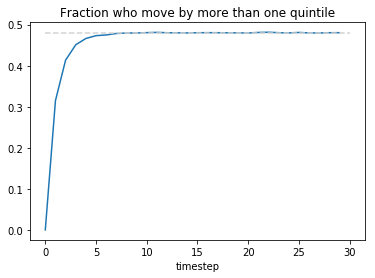

In [185]:
res = simMob(500000,30)
plt.plot(res)
plt.plot([0,30],[res[len(res)-1], res[len(res)-1]], linestyle='--', color='lightgray', linewidth=1.5)
plt.xlabel('timestep')
plt.title('Fraction who move by more than one quintile')
plt.show()